In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


## <b>Loan Prediction Using Deep Learning

### <b>Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics
from scipy import stats
from scipy.stats import norm, skew

#Data Preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#Deep Learning Model building
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
import keras_tuner as kt


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/loan_data.csv')
#df.convert_dtypes()

In [ ]:
df.head()
df.shape

(9578, 14)

In [ ]:
#Checking for Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### <b>EDA

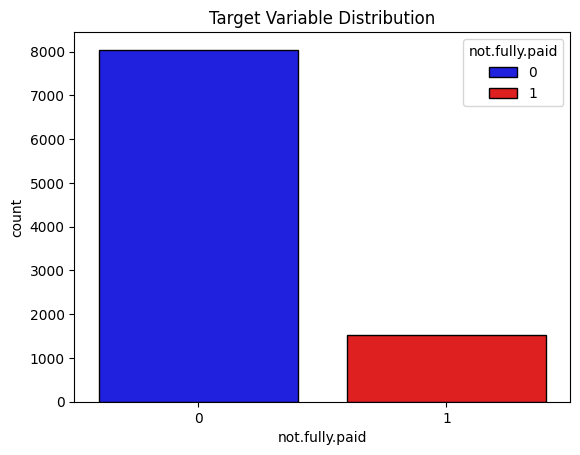

In [ ]:
#Plotting Target variable
sns.countplot(x='not.fully.paid', data= df,
              palette= ['blue','Red'],hue = 'not.fully.paid', edgecolor='black')
plt.title('Target Variable Distribution')
plt.show()

In [ ]:
df.value_counts('not.fully.paid')

,count
not.fully.paid,
0,8045
1,1533


We can see that the target variable is uneven and requires balancing.

In [ ]:
# Summary Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


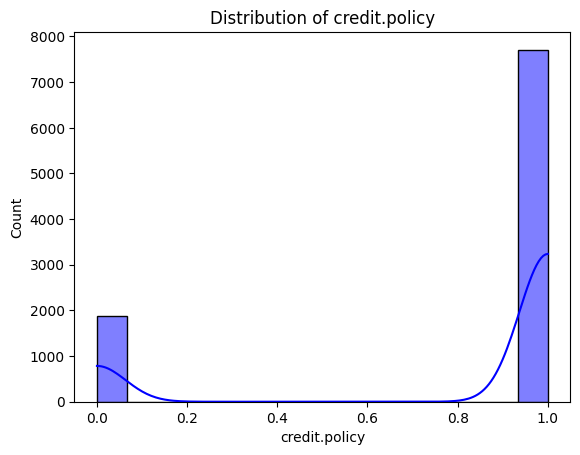

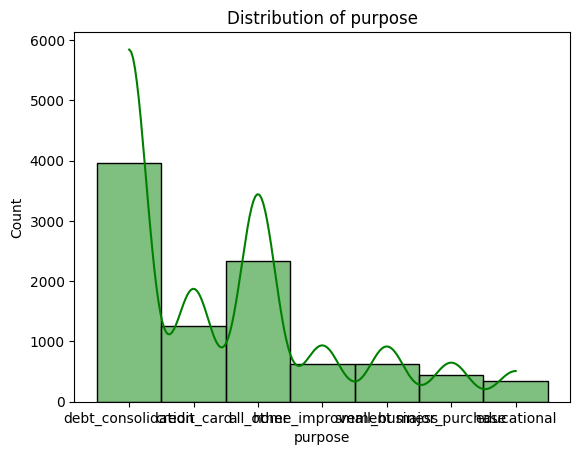

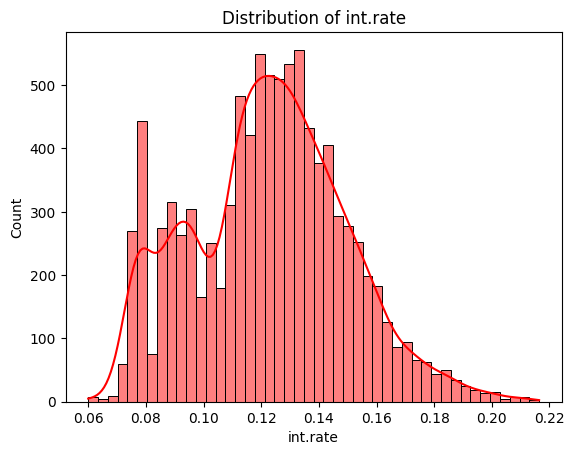

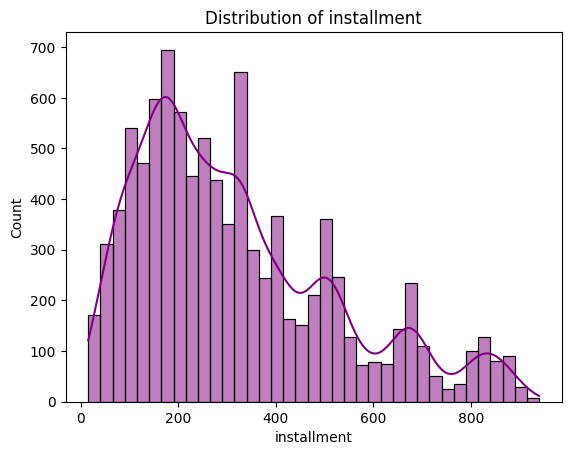

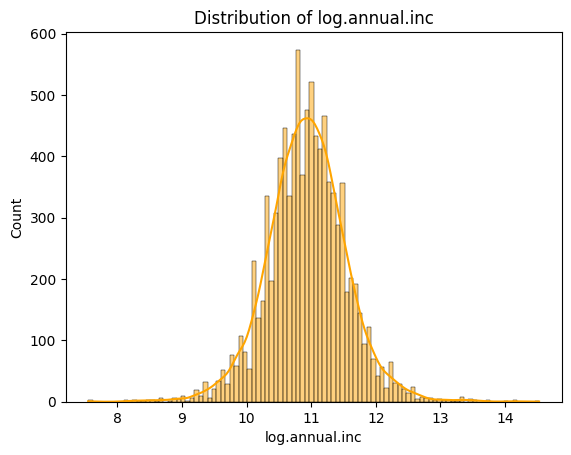

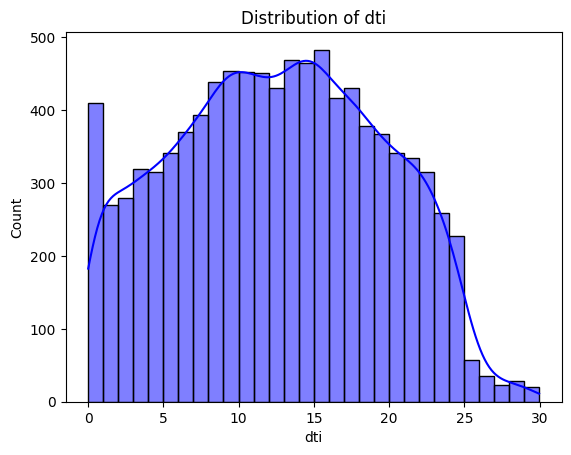

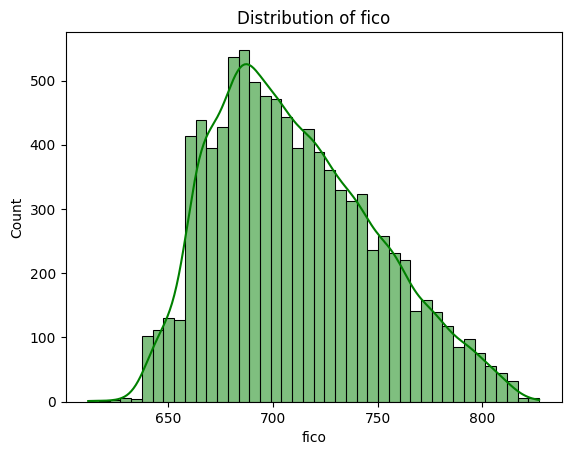

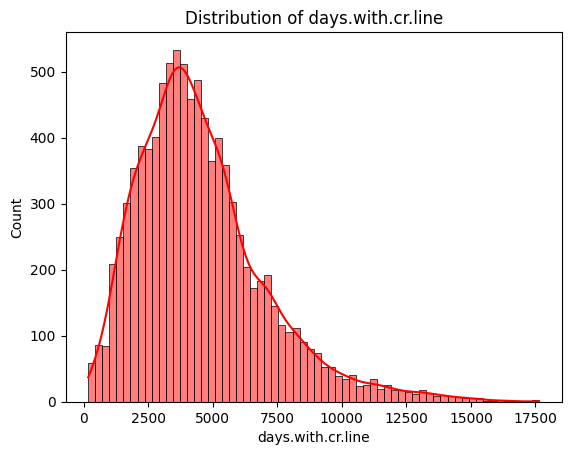

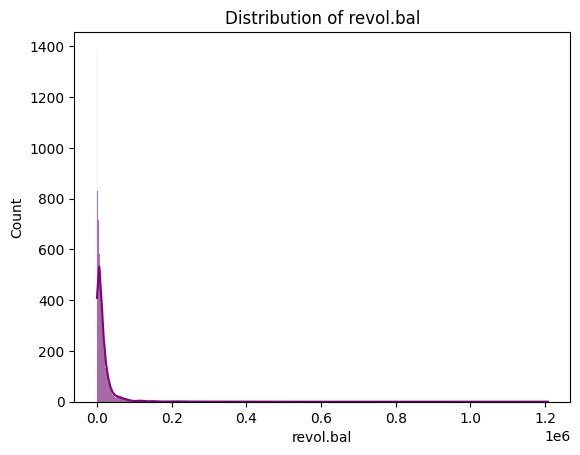

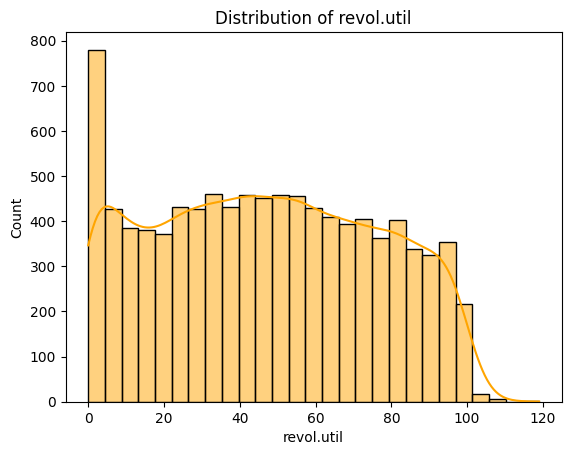

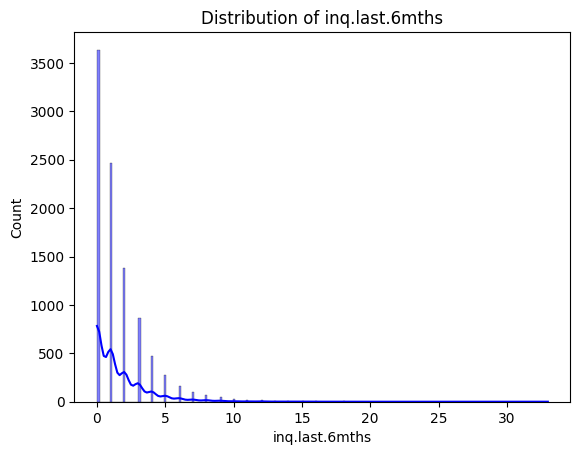

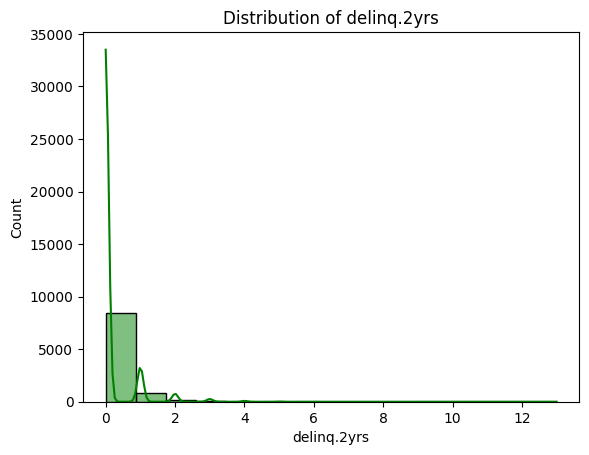

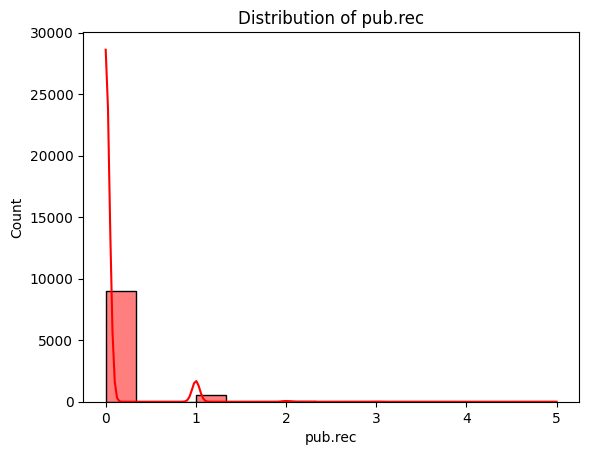

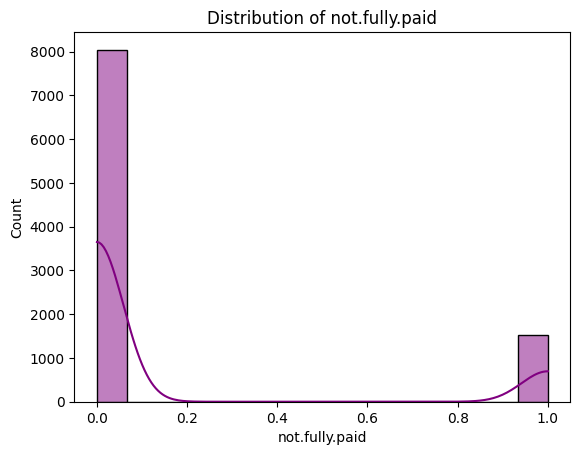

In [ ]:
# Plotting histogram to check the distribution of continous value
# List of colors
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, color=colors[i % len(colors)])
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
#Checking the skewness of the data
df.select_dtypes(include=['float', 'int']).skew()

,0
credit.policy,-1.539621
int.rate,0.164420
installment,0.912522
log.annual.inc,0.028668
dti,0.023941
fico,0.471260
days.with.cr.line,1.155748
revol.bal,11.161058
revol.util,0.059985
inq.last.6mths,3.584151


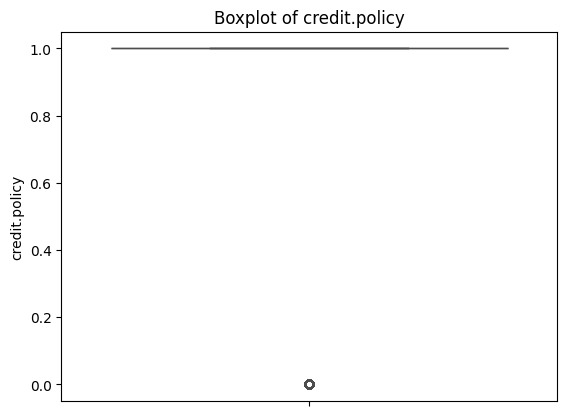

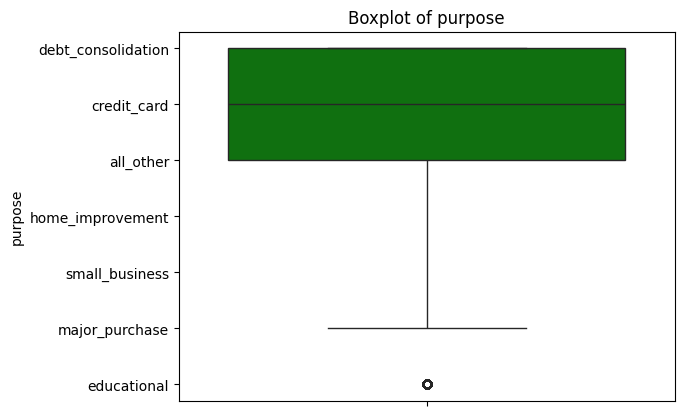

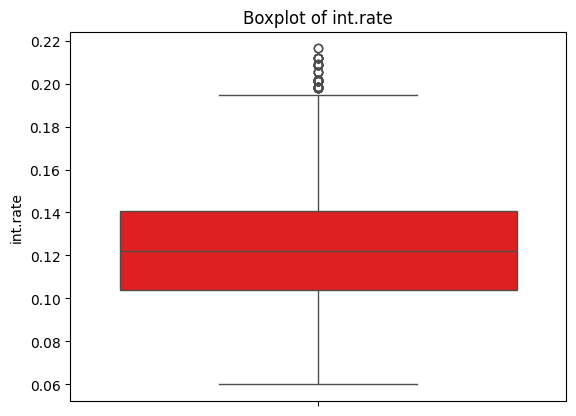

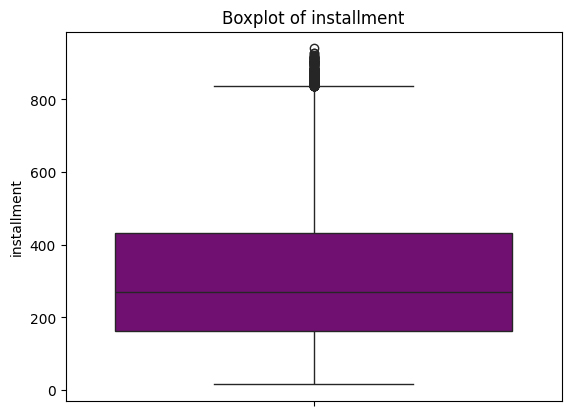

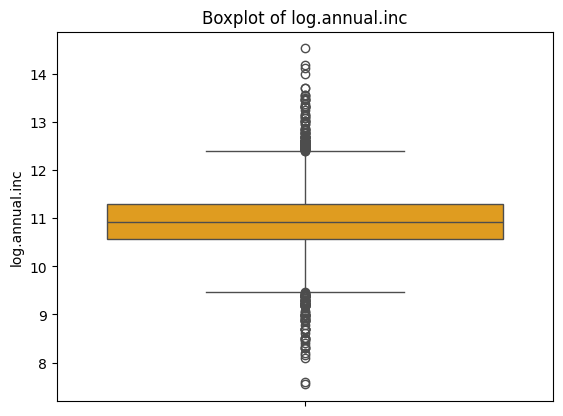

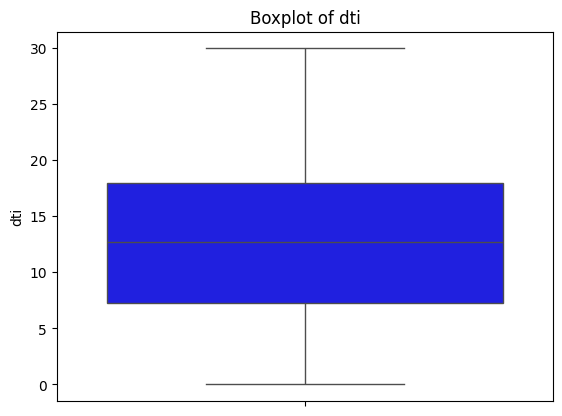

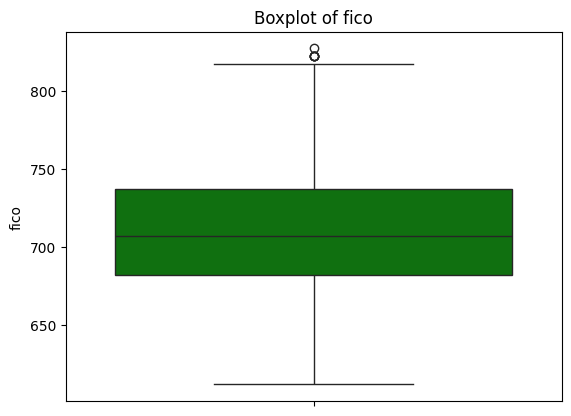

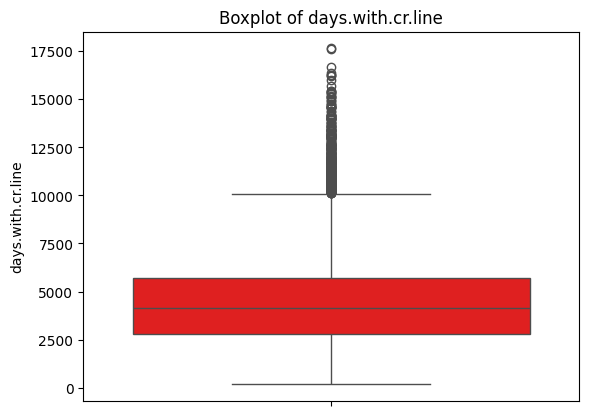

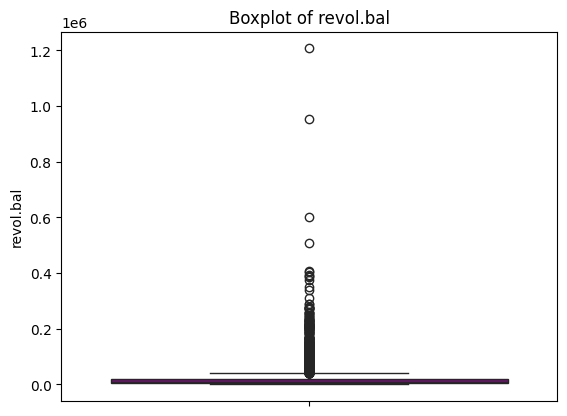

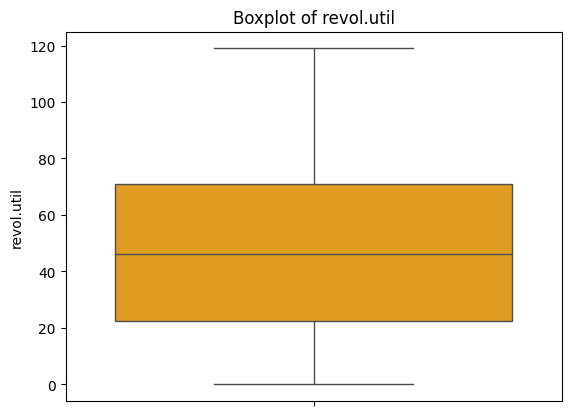

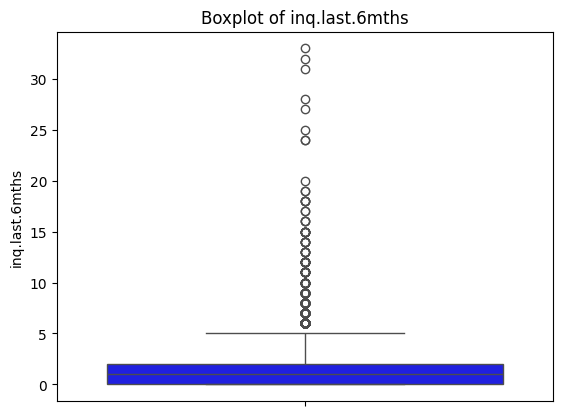

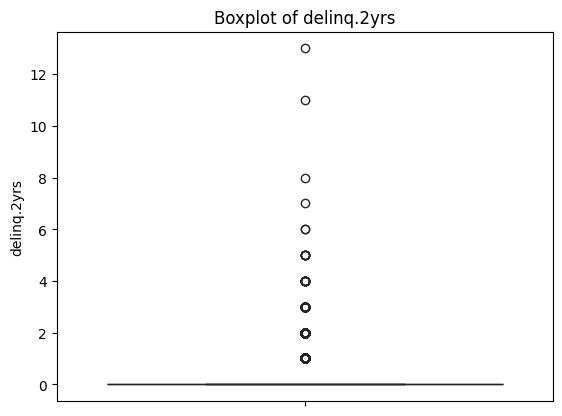

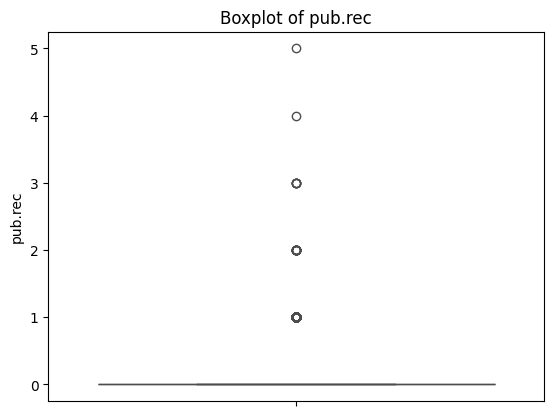

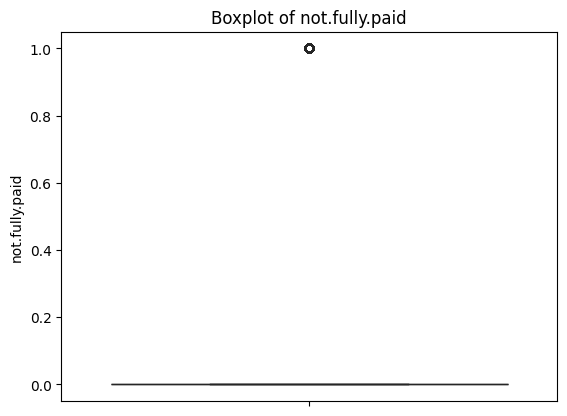

In [ ]:
# Plotting the Boxplot to check for the outliers
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col],color=colors[i % len(colors)])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# one-hot encoding the categorical column
df = pd.get_dummies(df, columns=['purpose'])
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


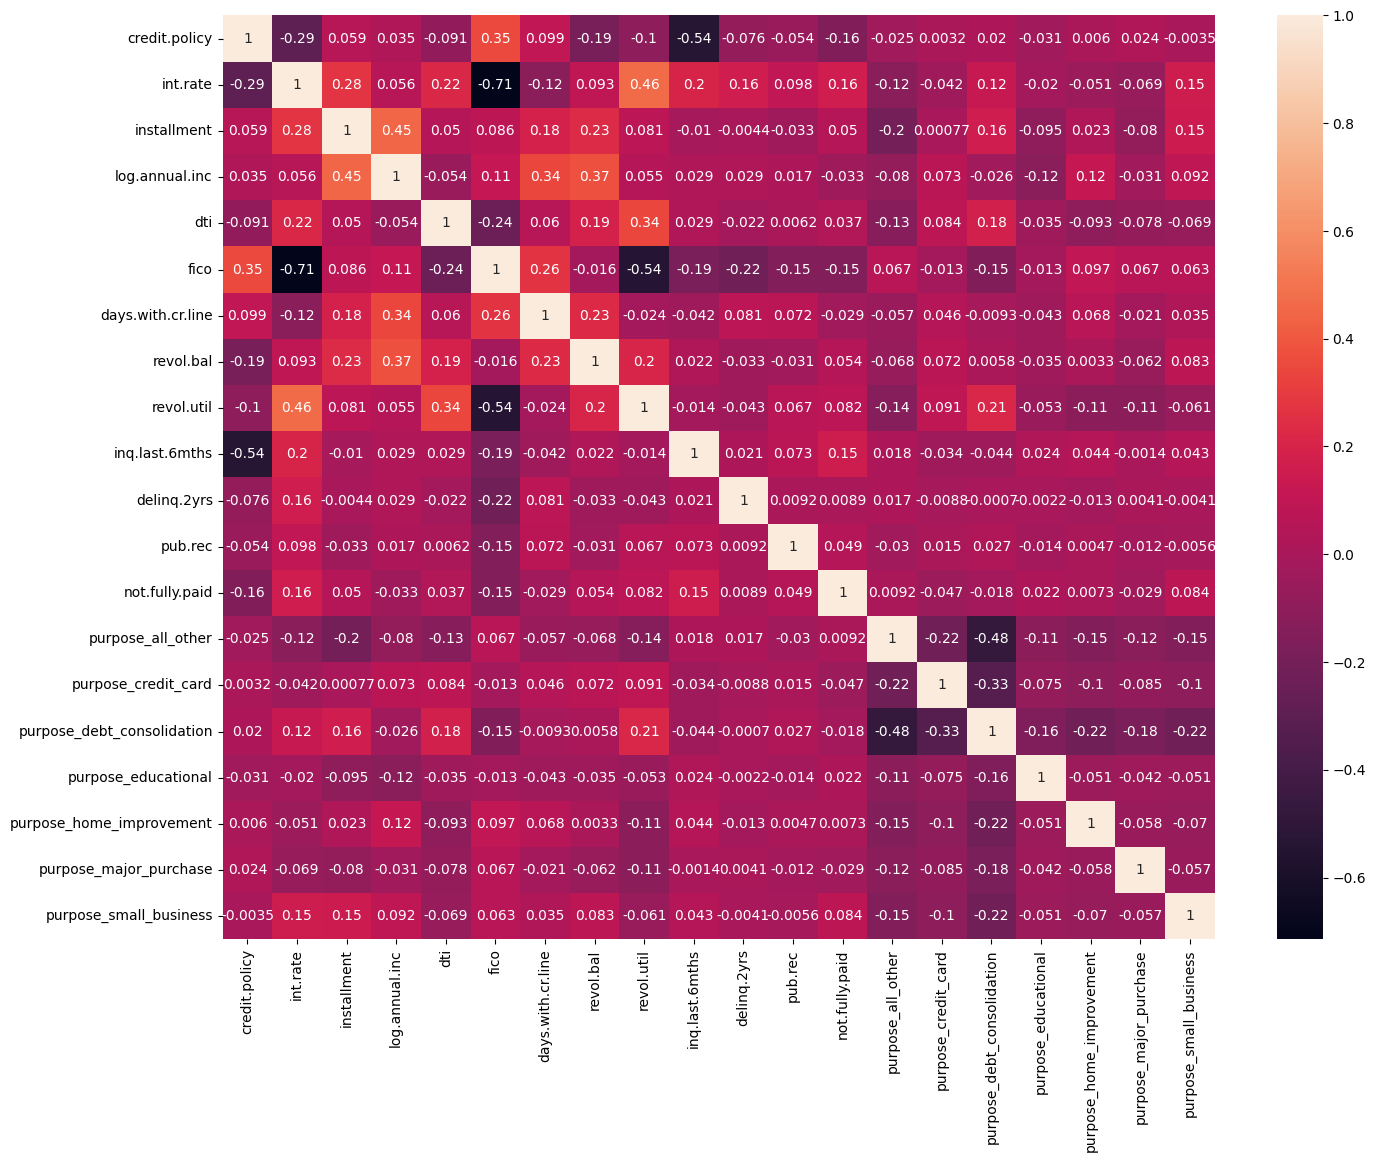

In [ ]:
# Correlation heatmap
plt.figure(figsize = (16,12))
sns.heatmap(data = df.corr(), annot = True)
plt.show()

In [ ]:
# Sorting the features with high correlation
matrix = df.corr()
corr_pairs = matrix.unstack() #makes correlation into a tuple
sorted_pairs = corr_pairs.sort_values(kind='quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

int.rate                    fico                         -0.714821
fico                        int.rate                     -0.714821
                            revol.util                   -0.541289
revol.util                  fico                         -0.541289
inq.last.6mths              credit.policy                -0.535511
credit.policy               inq.last.6mths               -0.535511
                            credit.policy                 1.000000
purpose_home_improvement    purpose_home_improvement      1.000000
int.rate                    int.rate                      1.000000
installment                 installment                   1.000000
log.annual.inc              log.annual.inc                1.000000
dti                         dti                           1.000000
fico                        fico                          1.000000
days.with.cr.line           days.with.cr.line             1.000000
revol.bal                   revol.bal                     1.00

#### Analysis of FICO score

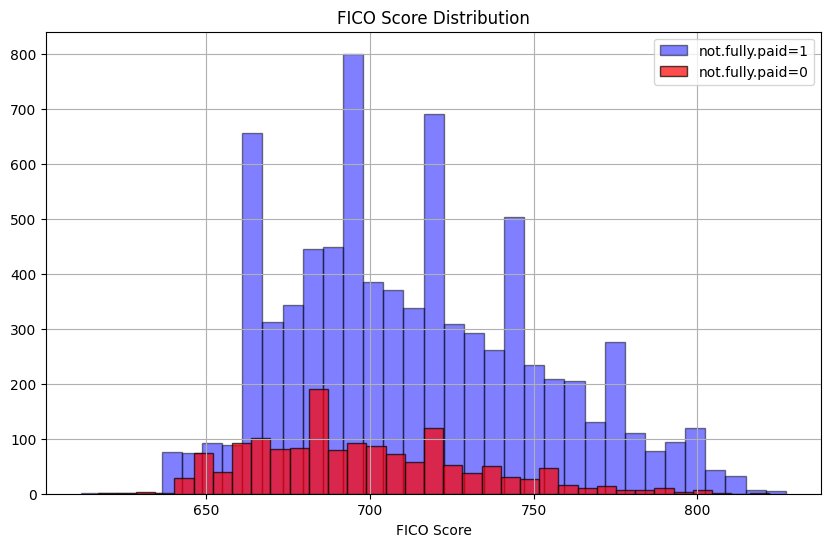

In [ ]:
# Distribution of FICO Score
plt.figure(figsize=(10,6))

df[df['not.fully.paid']==0]['fico'].hist(bins=35,alpha=0.5,
                                         label='not.fully.paid=1',color ='blue',edgecolor='black')
df[df['not.fully.paid']==1]['fico'].hist(bins=35,alpha=0.7,
                                         label='not.fully.paid=0',color='red',edgecolor='black')
plt.title('FICO Score Distribution')
plt.xlabel('FICO Score')
plt.legend()

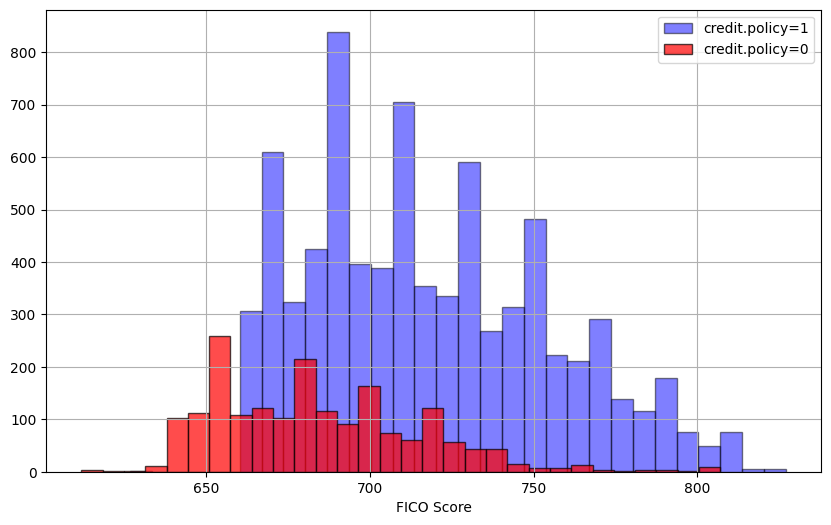

In [ ]:
# FICO Score and the credit policy
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=30,alpha=0.5,
                                        label='credit.policy=1',color ='blue',edgecolor='black')
df[df['credit.policy']==0]['fico'].hist(bins=30,alpha=0.7,
                                        label='credit.policy=0',color ='red',edgecolor='black')
plt.xlabel('FICO Score')
plt.legend()

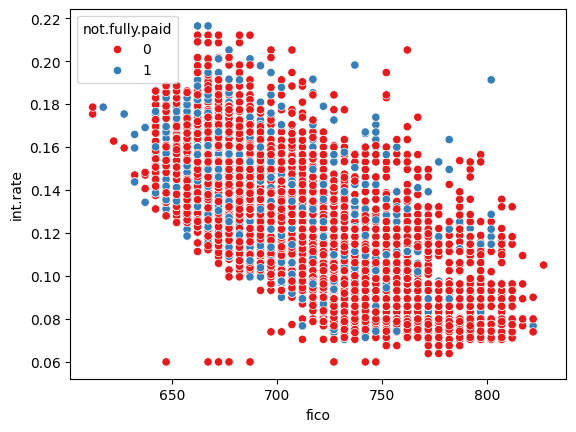

In [ ]:
# FICO Score and Interest Rate
sns.scatterplot(x = "fico", y = "int.rate", data = df[["fico", "int.rate", "not.fully.paid"]],
                hue = 'not.fully.paid', palette ='Set1');

Lower the fico score higher is the interest rate. Loans with higher interest rates, which correspond to lower FICO scores, have a higher likelihood of not being fully paid back.

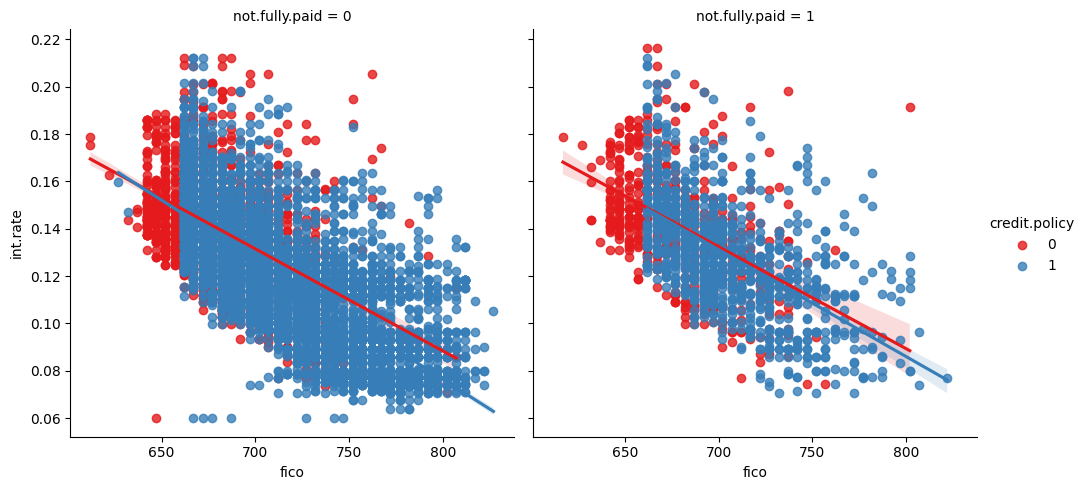

In [ ]:
# FICO Score and Interest with Credit Policy
sns.lmplot(x='fico',y='int.rate',data=df,col='not.fully.paid',
                                hue='credit.policy',palette='Set1')

Loans meeting credit policy (high FICO scores) have lower interest rates and higher repayment rates, while non-compliant loans are riskier, often leading to defaults.

###<b>Modeling

####Splitting the Dataset

In [ ]:
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

X = df.drop("not.fully.paid", axis = 1)
y = df["not.fully.paid"] #Target

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                  random_state=0)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Converting labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=2)

#### <b>Base DNN Model

#### DNN Model Architecture 1

In [ ]:
#DNN Architecture 1
# Building the DNN model
def create_deep_dnn_model1():
    model = Sequential()
    # Input layer + 1st hidden layer
    model.add(Dense(256, activation='relu', input_shape=(X_train_scale.shape[1],)))
    model.add(Dropout(0.3))
    # 2nd hidden layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # 3rd hidden layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    # Output layer
    model.add(Dense(2, activation='sigmoid'))  # Using Sigmoid

    # Compiling the model
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Creating the model
model1 = create_deep_dnn_model1()

# Train the model
history1 = model1.fit(X_train_scale, y_train_cat, epochs=25, validation_data=(X_test_scale, y_test_cat), batch_size=64)

# Summary of the model
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7278 - loss: 0.6262 - val_accuracy: 0.8429 - val_loss: 0.4862
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8362 - loss: 0.4903 - val_accuracy: 0.8429 - val_loss: 0.4449
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8448 - loss: 0.4569 - val_accuracy: 0.8429 - val_loss: 0.4328
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8352 - loss: 0.4645 - val_accuracy: 0.8429 - val_loss: 0.4256
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8340 - loss: 0.4573 - val_accuracy: 0.8429 - val_loss: 0.4207
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8401 - loss: 0.4372 - val_accuracy: 0.8429 - val_loss: 0.4174
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8437 - loss: 0.4281 - val_accuracy: 0.8429 - val_loss: 0.4154
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8401 - loss: 0.4363 - val_accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,404 (181.27 KB)

 Trainable params: 46,402 (181.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

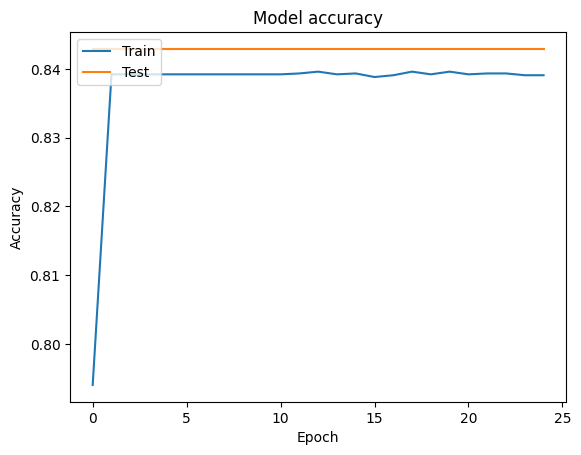

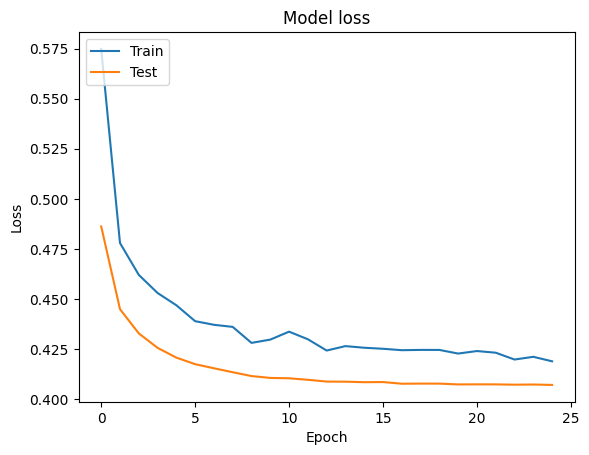

In [ ]:
# Plotting training & Test accuracy values
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & test loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = model1.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Evaluating the model on the training set
train_loss, train_accuracy = model1.evaluate(X_train_scale, y_train_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - loss: 0.3958
Test Loss: 0.4070628881454468
Test Accuracy: 0.842901885509491
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.4127
Train Loss: 0.40983396768569946
Train Accuracy: 0.8392064571380615


In [ ]:
from sklearn.metrics import classification_report

y_pred = model1.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.00      0.00      0.00       301

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####DNN Model Architecture 2

In [ ]:
#DNN Architecture 2
# Building the DNN model with deep networks
def create_deep_dnn_model2():
    model = Sequential()
    # Input layer + 1st hidden layer
    model.add(Dense(512, activation='relu', input_shape=(X_train_scale.shape[1],)))
    model.add(Dropout(0.3))
    # 2nd hidden layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    # 3rd hidden layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # Output layer
    model.add(Dense(2, activation='sigmoid'))  # Using Sigmoid

    # Compiling the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Creating the model
model2 = create_deep_dnn_model2()

# Train the model
history2 = model2.fit(X_train_scale, y_train_cat, epochs=50, validation_data=(X_test_scale, y_test_cat), batch_size=64)

# Summary of the model
model2.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8267 - loss: 0.4629 - val_accuracy: 0.8429 - val_loss: 0.4082
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8345 - loss: 0.4241 - val_accuracy: 0.8429 - val_loss: 0.4071
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8367 - loss: 0.4209 - val_accuracy: 0.8408 - val_loss: 0.4108
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8390 - loss: 0.4123 - val_accuracy: 0.8419 - val_loss: 0.4078
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8465 - loss: 0.3966 - val_accuracy: 0.8429 - val_loss: 0.4098
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8424 - loss: 0.4024 - val_accuracy: 0.8419 - val_loss: 0.4098
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8396 - loss: 0.4061 - val_accuracy: 0.8413 - val_loss: 0.4109
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8395 - loss: 0.4031 - val_accuracy: 0.8377 - va

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │          10,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 524,168 (2.00 MB)

 Trainable params: 174,722 (682.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 349,446 (1.33 MB)

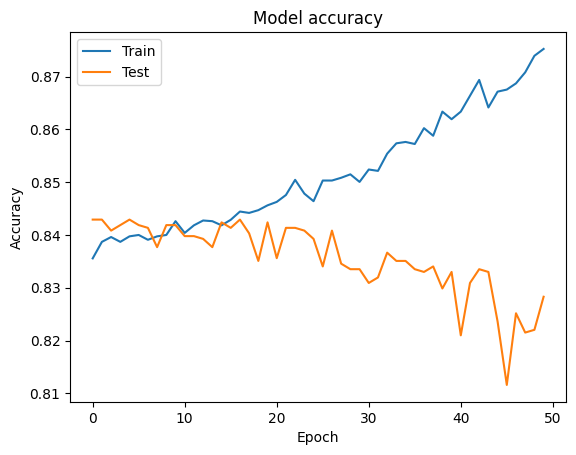

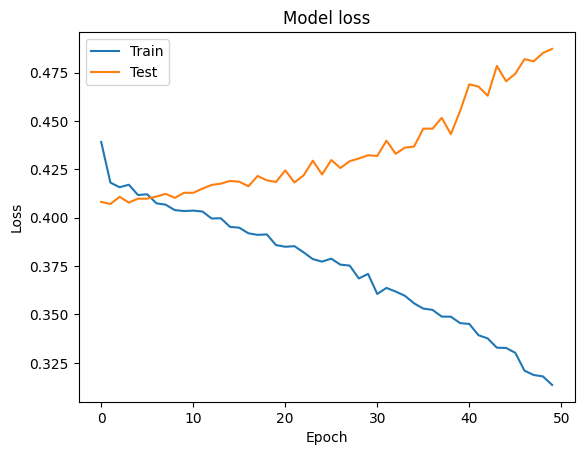

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = model2.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Evaluating the model on the training set
train_loss, train_accuracy = model2.evaluate(X_train_scale, y_train_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8416 - loss: 0.4520
Test Loss: 0.48720481991767883
Test Accuracy: 0.8282880783081055
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8926 - loss: 0.2665
Train Loss: 0.2657652199268341
Train Accuracy: 0.8927173018455505


In [ ]:
from sklearn.metrics import classification_report

y_pred = model2.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1615
           1       0.36      0.12      0.18       301

    accuracy                           0.83      1916
   macro avg       0.61      0.54      0.54      1916
weighted avg       0.78      0.83      0.79      1916



####DNN Model Architecture 3

In [ ]:
#DNN Architecture 3
# Building the DNN model with deep networks
def create_deep_dnn_model3():
    model = Sequential()
    # Input layer + 1st hidden layer
    model.add(Dense(1024, activation='relu', input_shape=(X_train_scale.shape[1],)))
    model.add(Dropout(0.3))
    # 2nd hidden layer
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    # 3rd hidden layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    # 4th hidden layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # Output layer
    model.add(Dense(2, activation='softmax'))  # Use softmax for multi-class classification (binary here)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Creating the model
model3 = create_deep_dnn_model3()

# Train the model
history3 = model3.fit(X_train_scale, y_train_cat, epochs=100, validation_data=(X_test_scale, y_test_cat), batch_size=64)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8226 - loss: 0.4715 - val_accuracy: 0.8429 - val_loss: 0.4150
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8363 - loss: 0.4264 - val_accuracy: 0.8429 - val_loss: 0.4122
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8439 - loss: 0.4082 - val_accuracy: 0.8429 - val_loss: 0.4126
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8435 - loss: 0.4141 - val_accuracy: 0.8429 - val_loss: 0.4116
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8373 - loss: 0.4118 - val_accuracy: 0.8392 - val_loss: 0.4136
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8411 - loss: 0.4128 - val_accuracy: 0.8429 - val_loss: 0.4129
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8389 - loss: 0.4156 - val_accuracy: 0.8392 - val_loss: 0.4140
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8388 - loss: 0.4088 - val_accuracy

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1024)                │          20,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,129,288 (8.12 MB)

 Trainable params: 709,762 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,419,526 (5.42 MB)

In [ ]:
# Summary of the model
model3.summary()

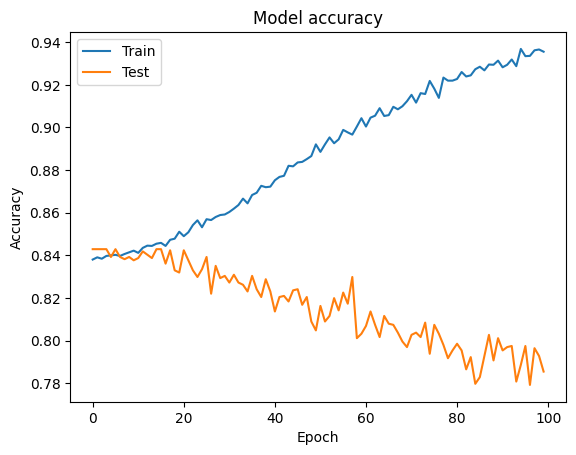

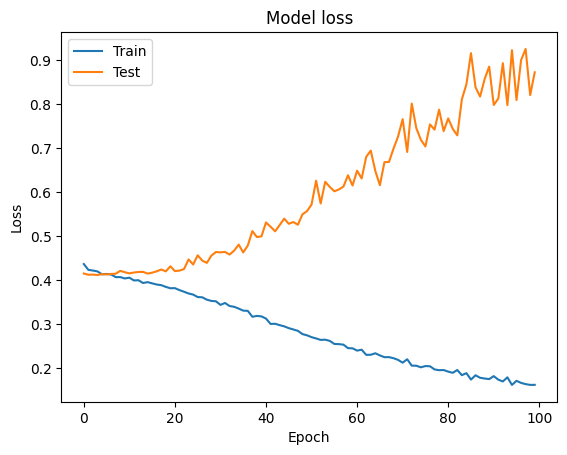

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = model3.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Evaluating the model on the training set
train_loss, train_accuracy = model3.evaluate(X_train_scale, y_train_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.8017
Test Loss: 0.8723062872886658
Test Accuracy: 0.7854906320571899
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0801
Train Loss: 0.08292093127965927
Train Accuracy: 0.9695901870727539


In [ ]:
from sklearn.metrics import classification_report

y_pred = model3.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1615
           1       0.25      0.18      0.21       301

    accuracy                           0.79      1916
   macro avg       0.55      0.54      0.54      1916
weighted avg       0.76      0.79      0.77      1916



####<b>DNN Model with SMOTE

####Data Splitting and Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

X_smote = df.drop("not.fully.paid", axis=1)
y_smote = df["not.fully.paid"]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=50)
X_train_smote, y_train_smote = smote.fit_resample(X_smote, y_smote)

# Standardizing the features after SMOTE
scaler = StandardScaler()
X_train_smote_scale = scaler.fit_transform(X_train_smote)
X_test_scale = scaler.transform(X_test)

# Converting labels to categorical (only if using categorical crossentropy)
y_train_smote_cat = tf.keras.utils.to_categorical(y_train_smote, num_classes=2)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=2)

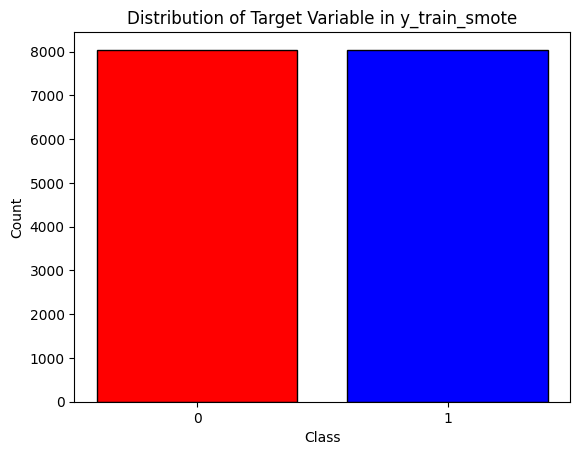

In [ ]:
#Plotting target variable after applying SMOTE
class_counts = y_train_smote.value_counts()

plt.bar([0, 1], class_counts.values, color=['red', 'blue'], edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable in y_train_smote')
plt.xticks([0, 1])
plt.show()

####DNN Model Architecture 1 (SMOTE)

In [ ]:
#DNN Architecture 1
# Building the DNN model with deep networks
def create_deep_dnn_model1():
    model = Sequential()
    # Input layer + 1st hidden layer
    model.add(Dense(256, activation='relu', input_shape=(X_train_smote_scale.shape[1],)))
    model.add(Dropout(0.3))
    # 2nd hidden layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # 3rd hidden layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    # Output layer
    model.add(Dense(2, activation='sigmoid'))  # Using Sigmoid

    # Compiling the model
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Creating the model
model1 = create_deep_dnn_model1()

# Train the model
history1 = model1.fit(X_train_smote_scale, y_train_smote_cat, epochs=50,
                      validation_data=(X_test_scale, y_test_cat), batch_size=64)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5206 - loss: 0.7050 - val_accuracy: 0.6654 - val_loss: 0.6541
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6266 - loss: 0.6601 - val_accuracy: 0.6957 - val_loss: 0.6185
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6862 - loss: 0.6186 - val_accuracy: 0.7323 - val_loss: 0.5835
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7255 - loss: 0.5751 - val_accuracy: 0.7599 - val_loss: 0.5465
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7529 - loss: 0.5317 - val_accuracy: 0.7688 - val_loss: 0.5118
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7693 - loss: 0.5011 - val_accuracy: 0.7735 - val_loss: 0.4943
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7722 - loss: 0.4835 - val_accuracy: 0.7818 - val_loss: 0.4818
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7851 - loss: 0.4624 - val_accuracy: 0.7944 - val

In [ ]:
# Summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,404 (181.27 KB)

 Trainable params: 46,402 (181.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

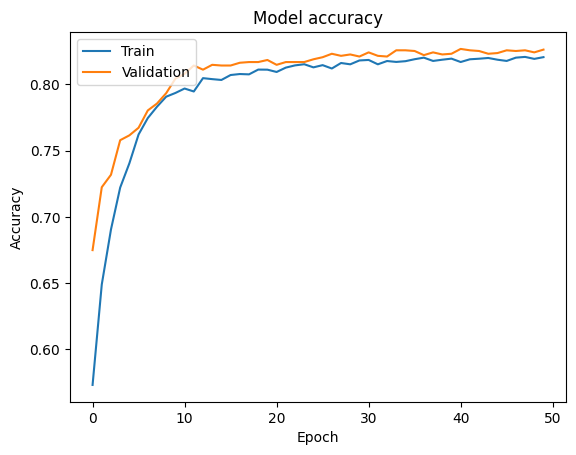

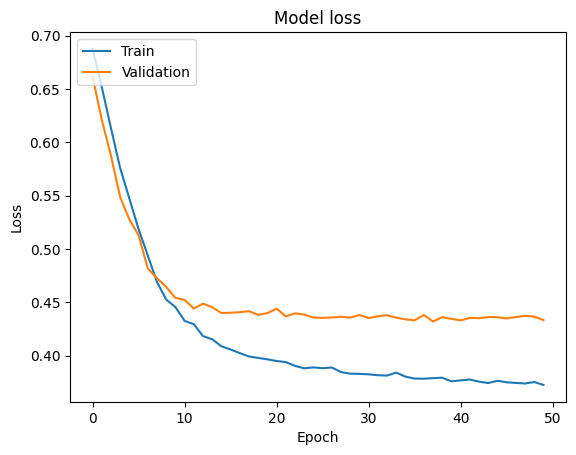

In [ ]:
# Plot training & validation accuracy values

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the training set
train_loss, train_accuracy = model1.evaluate(X_train_smote_scale, y_train_smote_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

# Evaluating the model on the test set
test_loss, test_accuracy = model1.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8424 - loss: 0.4058
Train Loss: 0.3596397340297699
Train Accuracy: 0.826662540435791
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8371 - loss: 0.4347
Test Loss: 0.4374827444553375
Test Accuracy: 0.8230689167976379


In [ ]:
#Creating Classification report of the model
from sklearn.metrics import classification_report

y_pred = model1.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1611
           1       0.39      0.16      0.22       305

    accuracy                           0.83      1916
   macro avg       0.62      0.56      0.56      1916
weighted avg       0.78      0.83      0.79      1916



####DNN Model Architecture 2 (SMOTE)

In [ ]:
#DNN Architecture 2
# Building the DNN model with deep networks
def create_deep_dnn_model2():
    model = Sequential()
    # Input layer + 1st hidden layer
    model.add(Dense(512, activation='relu', input_shape=(X_train_smote_scale.shape[1],)))
    model.add(Dropout(0.3))
    # 2nd hidden layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    # 3rd hidden layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # Output layer
    model.add(Dense(2, activation='sigmoid'))  # Using Sigmoid

    # Compiling the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Creating the model
model2 = create_deep_dnn_model2()

history2 = model2.fit(X_train_smote_scale, y_train_smote_cat,
                      epochs=50, validation_data=(X_test_scale, y_test_cat),
                      batch_size=64)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


252/252 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7466 - loss: 0.4962 - val_accuracy: 0.8205 - val_loss: 0.4333
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8093 - loss: 0.3871 - val_accuracy: 0.8252 - val_loss: 0.4443
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8146 - loss: 0.3740 - val_accuracy: 0.8194 - val_loss: 0.4632
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8198 - loss: 0.3685 - val_accuracy: 0.8173 - val_loss: 0.4412
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8252 - loss: 0.3680 - val_accuracy: 0.8126 - val_loss: 0.4447
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8214 - loss: 0.3652 - val_accuracy: 0.8210 - val_loss: 0.4325
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.3646 - val_accuracy: 0.8225 - val_loss: 0.4446
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.3655 - val_accuracy: 0.8340 - va

In [ ]:
# Summary of the model
model2.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                     │ (None, 512)                 │          10,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 524,168 (2.00 MB)

 Trainable params: 174,722 (682.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 349,446 (1.33 MB)

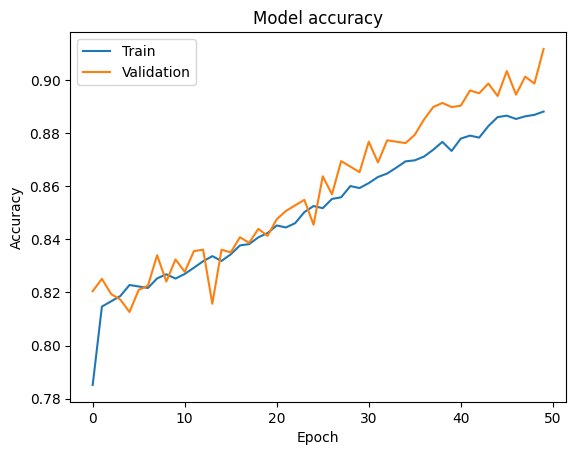

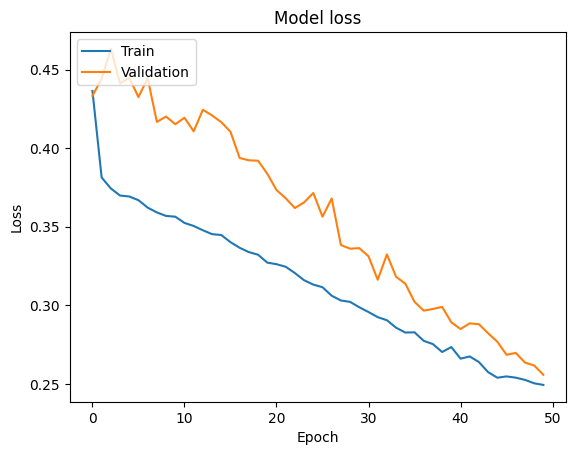

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the training set
train_loss, train_accuracy = model2.evaluate(X_train_smote_scale, y_train_smote_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

# Evaluating the model on the test set
test_loss, test_accuracy = model2.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9077 - loss: 0.2440
Train Loss: 0.19521303474903107
Train Accuracy: 0.9225605726242065
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9203 - loss: 0.2499
Test Loss: 0.25574061274528503
Test Accuracy: 0.9117953777313232


In [ ]:
from sklearn.metrics import classification_report

y_pred = model2.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2408
           1       0.76      0.59      0.66       466

    accuracy                           0.90      2874
   macro avg       0.84      0.78      0.80      2874
weighted avg       0.90      0.90      0.90      2874



#### DNN Model Architecture 3 (SMOTE)

In [ ]:
#DNN Architecture 3
# Building the DNN model with deep networks
def create_deep_dnn_model3():
    model = Sequential()
    # Input layer + 1st hidden layer
    model.add(Dense(1024, activation='relu', input_shape=(X_train_smote_scale.shape[1],)))
    model.add(Dropout(0.3))
    # 2nd hidden layer
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    # 3rd hidden layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    # 4th hidden layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # Output layer
    model.add(Dense(2, activation='softmax'))  # Using softmax

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Creating the model
model3 = create_deep_dnn_model3()

# Train the model
history3 = model3.fit(X_train_smote_scale, y_train_smote_cat, epochs=100,
                      validation_data=(X_test_scale, y_test_cat), batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.7502 - loss: 0.4822 - val_accuracy: 0.8194 - val_loss: 0.4288
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8183 - loss: 0.3808 - val_accuracy: 0.8309 - val_loss: 0.4609
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8157 - loss: 0.3721 - val_accuracy: 0.7991 - val_loss: 0.4889
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8206 - loss: 0.3721 - val_accuracy: 0.8309 - val_loss: 0.4393
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8216 - loss: 0.3687 - val_accuracy: 0.8236 - val_loss: 0.4473
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8233 - loss: 0.3616 - val_accuracy: 0.8048 - val_loss: 0.4580
Epoch 7/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8203 - loss: 0.3671 - val_accuracy: 0.8121 - val_loss: 0.4324
Epoch 8/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8250 - loss: 0.3588 - val_ac

In [ ]:
# Summary of the model
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          20,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,129,288 (8.12 MB)

 Trainable params: 709,762 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,419,526 (5.42 MB)

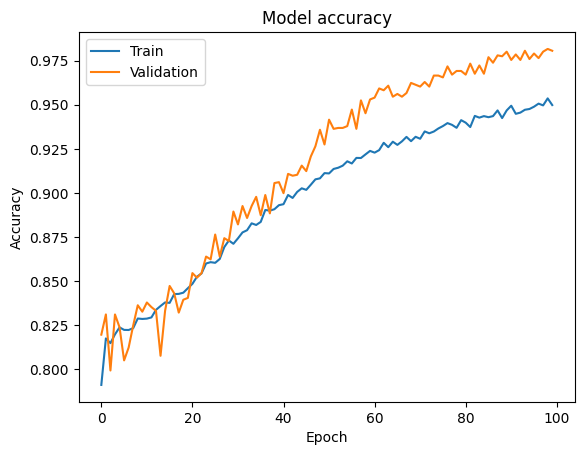

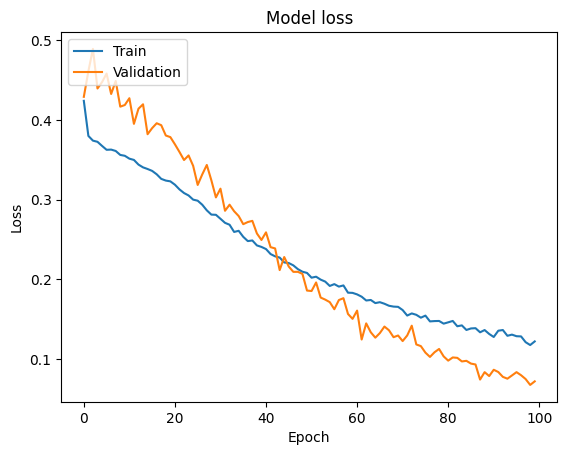

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the training set
train_loss, train_accuracy = model3.evaluate(X_train_smote_scale, y_train_smote_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

# Evaluating the model on the test set
test_loss, test_accuracy = model3.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9825 - loss: 0.0665
Train Loss: 0.05078640952706337
Train Accuracy: 0.9867619872093201
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9869 - loss: 0.0656
Test Loss: 0.07191643118858337
Test Accuracy: 0.9806889295578003


In [ ]:
from sklearn.metrics import classification_report

y_pred = model3.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1611
           1       0.95      0.93      0.94       305

    accuracy                           0.98      1916
   macro avg       0.97      0.96      0.96      1916
weighted avg       0.98      0.98      0.98      1916



####<b>Tuned DNN Model

####Tuned Model 1

In [ ]:
#Tuned Model Architecture 1
def build_model(hp):
    model = Sequential()

    # Input layer + 1st hidden layer with tunable units and dropout
    model.add(Dense(units=hp.Int('units_1', min_value=512, max_value=1024, step=128),
                    activation='relu', input_shape=(X_train_smote_scale.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # 2nd hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=256, max_value=512, step=64),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # 3rd hidden layer
    model.add(Dense(units=hp.Int('units_3', min_value=128, max_value=256, step=32),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(2, activation='softmax'))

    # Compile the model with tunable learning rate
    model.compile(optimizer=SGD(learning_rate=hp.Float('learning_rate', min_value=1e-4,
                                                       max_value=1e-2, sampling='LOG')),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a RandomSearch tuner to find the optimal hyperparameters
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=20,  # Maximum number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per trial to average out randomness
    directory='random_search_dir',  # Directory to save the tuning results
    project_name='dnn_smote_random_search1'  # Project name for easier tracking
)

# Run the search to find the best hyperparameters
tuner.search(X_train_smote_scale, y_train_smote_cat, epochs=20,
             validation_data=(X_test_scale, y_test_cat), batch_size=64)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_smote_scale, y_train_smote_cat, epochs=50,
                         validation_data=(X_test_scale, y_test_cat), batch_size=64)

# Summary of the tuned model
best_model.summary()

Trial 20 Complete [00h 01m 40s]
val_accuracy: 0.806367427110672

Best val_accuracy So Far: 0.8204592764377594
Total elapsed time: 00h 43m 12s
Epoch 1/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5585 - loss: 0.6860 - val_accuracy: 0.6634 - val_loss: 0.6520
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6836 - loss: 0.6182 - val_accuracy: 0.7359 - val_loss: 0.5913
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7267 - loss: 0.5653 - val_accuracy: 0.7531 - val_loss: 0.5552
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7491 - loss: 0.5251 - val_accuracy: 0.7683 - val_loss: 0.5161
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7693 - loss: 0.4917 - val_accuracy: 0.7751 - val_loss: 0.5005
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7867 - loss: 0.4614 - val_accuracy: 0.7824 - val_loss: 0.4751
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7932 - loss: 0.44

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 768)                 │          15,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 160)                 │          82,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491,492 (1.87 MB)

 Trainable params: 491,490 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#printing the best parameters
print("Best hyperparameters:")
print(f"Units in first dense layer: {best_hps.get('units_1')}")
print(f"Dropout rate after first dense layer: {best_hps.get('dropout_1')}")
print(f"Units in second dense layer: {best_hps.get('units_2')}")
print(f"Dropout rate after second dense layer: {best_hps.get('dropout_2')}")
print(f"Units in third dense layer: {best_hps.get('units_3')}")
print(f"Dropout rate after third dense layer: {best_hps.get('dropout_3')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Best hyperparameters:
Units in first dense layer: 768
Dropout rate after first dense layer: 0.4
Units in second dense layer: 512
Dropout rate after second dense layer: 0.2
Units in third dense layer: 160
Dropout rate after third dense layer: 0.4
Learning rate: 0.00602482242977811


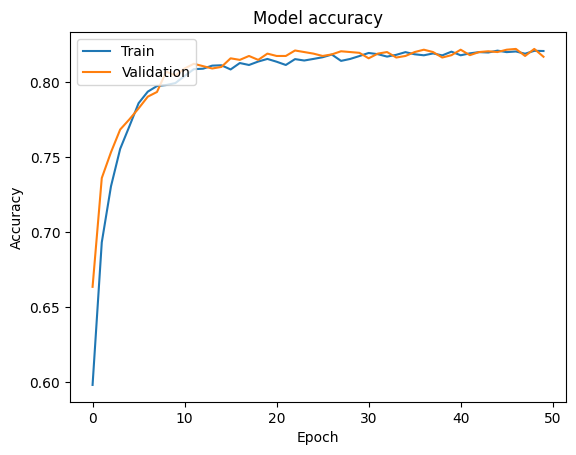

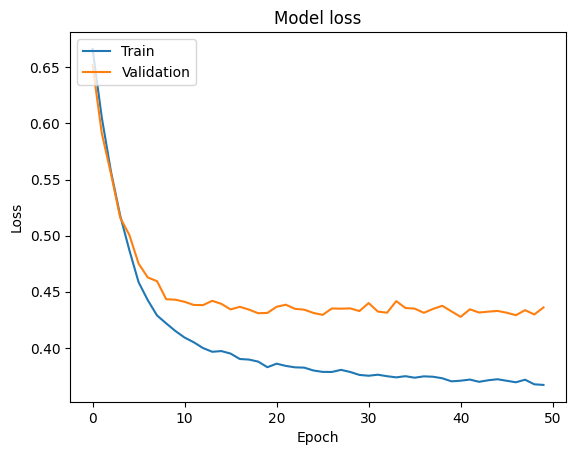

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Evaluating the model on the training set
train_loss, train_accuracy = best_model.evaluate(X_train_smote_scale, y_train_smote_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8239 - loss: 0.4348
Test Loss: 0.4360116124153137
Test Accuracy: 0.8168058395385742
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8404 - loss: 0.4026
Train Loss: 0.354257732629776
Train Accuracy: 0.827284038066864


In [ ]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1611
           1       0.35      0.17      0.23       305

    accuracy                           0.82      1916
   macro avg       0.60      0.56      0.56      1916
weighted avg       0.78      0.82      0.79      1916



#### Tuned Model 2

In [ ]:
#Tuned Model Architecture 2
def build_model(hp):
    model = Sequential()

    # Input layer + 1st hidden layer with tunable units and dropout
    model.add(Dense(units=hp.Int('units_1', min_value=512, max_value=1024, step=128),
                    activation='relu', input_shape=(X_train_smote_scale.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # 2nd hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=256, max_value=512, step=64),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # 3rd hidden layer
    model.add(Dense(units=hp.Int('units_3', min_value=128, max_value=256, step=64),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))

    # 4th hidden layer
    model.add(Dense(units=hp.Int('units_4', min_value=64, max_value=128, step=32),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_4', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(2, activation='softmax'))  # Softmax for classification

    # Compile the model with tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4,
                  max_value=1e-2, sampling='LOG')),loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create a tuner to find the optimal hyperparameters
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',  # Optimizingfor validation accuracy
    max_epochs=30,  # Max number of epochs to train per model
    factor=3,  # Reduction factor for Hyperband algorithm
    directory='my_tuner_dir',  # Directory to save the tuning results
    project_name='dnn_smote_tuning'  # Project name for easier tracking
)

# Run the search to find the best hyperparameters
tuner.search(X_train_smote_scale, y_train_smote_cat, epochs=50,
             validation_data=(X_test_scale, y_test_cat), batch_size=64)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_smote_scale, y_train_smote_cat, epochs=100,
                         validation_data=(X_test_scale, y_test_cat), batch_size=64)

# Summary of the tuned model
best_model.summary()

Trial 90 Complete [00h 00m 53s]
val_accuracy: 0.8846555352210999

Best val_accuracy So Far: 0.8846555352210999
Total elapsed time: 00h 35m 59s
Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.7621 - loss: 0.4654 - val_accuracy: 0.8137 - val_loss: 0.4543
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8114 - loss: 0.3852 - val_accuracy: 0.8064 - val_loss: 0.4671
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8182 - loss: 0.3726 - val_accuracy: 0.8335 - val_loss: 0.4555
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8128 - loss: 0.3812 - val_accuracy: 0.8252 - val_loss: 0.4453
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.3657 - val_accuracy: 0.8111 - val_loss: 0.4704
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8238 - loss: 0.3670 - val_accuracy: 0.8372 - val_loss: 0.4622
Epoch 7/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8184 - loss: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 768)                 │          15,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 96)                  │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,461,992 (5.58 MB)

 Trainable params: 487,330 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 974,662 (3.72 MB)

In [ ]:
print("Best hyperparameters:")
print(f"Units in first dense layer: {best_hps.get('units_1')}")
print(f"Dropout rate after first dense layer: {best_hps.get('dropout_1')}")
print(f"Units in second dense layer: {best_hps.get('units_2')}")
print(f"Dropout rate after second dense layer: {best_hps.get('dropout_2')}")
print(f"Units in third dense layer: {best_hps.get('units_3')}")
print(f"Dropout rate after third dense layer: {best_hps.get('dropout_3')}")
print(f"Units in fourth dense layer: {best_hps.get('units_4')}")
print(f"Dropout rate after fourth dense layer: {best_hps.get('dropout_4')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")


Best hyperparameters:
Units in first dense layer: 768
Dropout rate after first dense layer: 0.2
Units in second dense layer: 512
Dropout rate after second dense layer: 0.2
Units in third dense layer: 128
Dropout rate after third dense layer: 0.30000000000000004
Units in fourth dense layer: 96
Dropout rate after fourth dense layer: 0.30000000000000004
Learning rate: 0.002674245296397919


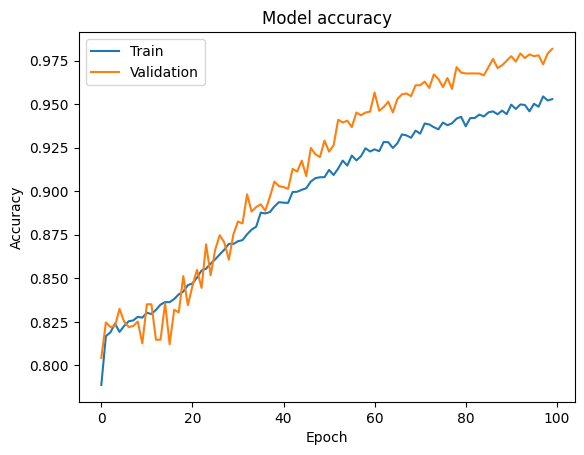

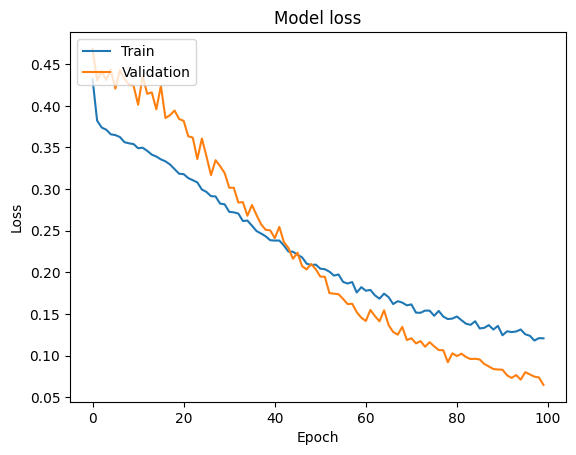

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluating the model on the training set
train_loss, train_accuracy = best_model.evaluate(X_train_smote_scale, y_train_smote_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

# Evaluating the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0614
Train Loss: 0.047564711421728134
Train Accuracy: 0.986824095249176
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0622
Test Loss: 0.06488405913114548
Test Accuracy: 0.9817327857017517


In [ ]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1611
           1       0.96      0.92      0.94       305

    accuracy                           0.98      1916
   macro avg       0.97      0.96      0.97      1916
weighted avg       0.98      0.98      0.98      1916



####Tuned Model 3

In [ ]:
#Tuned Model Architecture 3
def build_model(hp):
    model = Sequential()

    # Input layer + 1st hidden layer with tunable units and dropout
    model.add(Dense(units=hp.Int('units_1', min_value=512, max_value=1024, step=128),
                    activation='relu', input_shape=(X_train_smote_scale.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # 2nd hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=256, max_value=512, step=64),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # 3rd hidden layer
    model.add(Dense(units=hp.Int('units_3', min_value=128, max_value=256, step=64),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))

    # 4th hidden layer
    model.add(Dense(units=hp.Int('units_4', min_value=64, max_value=128, step=32),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_4', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(2, activation='softmax'))

    # Compile the model with tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4,
                                                        max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a RandomSearch tuner to find the optimal hyperparameters
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=20,  # Maximum number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per trial to average out randomness
    directory='random_search_dir',  # Directory to save the tuning results
    project_name='dnn_smote_random_search'  # Project name for easier tracking
)

# Runing the search to find the best hyperparameters
tuner.search(X_train_smote_scale, y_train_smote_cat, epochs=50,
             validation_data=(X_test_scale, y_test_cat), batch_size=64)
# Getting the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Building and train the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_smote_scale, y_train_smote_cat, epochs=100,
                        validation_data=(X_test_scale, y_test_cat), batch_size=64)
# Summary of the tuned model
best_model.summary()


Trial 20 Complete [00h 02m 22s]
val_accuracy: 0.9005740880966187

Best val_accuracy So Far: 0.9292797446250916
Total elapsed time: 00h 46m 24s
Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.7475 - loss: 0.5003 - val_accuracy: 0.8043 - val_loss: 0.4683
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8230 - loss: 0.3742 - val_accuracy: 0.8246 - val_loss: 0.4307
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8174 - loss: 0.3772 - val_accuracy: 0.8220 - val_loss: 0.4414
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8262 - loss: 0.3670 - val_accuracy: 0.8225 - val_loss: 0.4311
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8227 - loss: 0.3609 - val_accuracy: 0.8325 - val_loss: 0.4431
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8236 - loss: 0.3612 - val_accuracy: 0.8252 - val_loss: 0.4207
Epoch 7/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8201 - loss: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 896)                 │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 448)                 │         401,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 192)                 │          86,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,555,400 (5.93 MB)

 Trainable params: 518,466 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,036,934 (3.96 MB)

In [ ]:
#printing the best parameters
print("Best hyperparameters:")
print(f"Units in first dense layer: {best_hps.get('units_1')}")
print(f"Dropout rate after first dense layer: {best_hps.get('dropout_1')}")
print(f"Units in second dense layer: {best_hps.get('units_2')}")
print(f"Dropout rate after second dense layer: {best_hps.get('dropout_2')}")
print(f"Units in third dense layer: {best_hps.get('units_3')}")
print(f"Dropout rate after third dense layer: {best_hps.get('dropout_3')}")
print(f"Units in fourth dense layer: {best_hps.get('units_4')}")
print(f"Dropout rate after fourth dense layer: {best_hps.get('dropout_4')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")


Best hyperparameters:
Units in first dense layer: 896
Dropout rate after first dense layer: 0.2
Units in second dense layer: 448
Dropout rate after second dense layer: 0.4
Units in third dense layer: 192
Dropout rate after third dense layer: 0.2
Units in fourth dense layer: 64
Dropout rate after fourth dense layer: 0.30000000000000004
Learning rate: 0.0008019020731570195


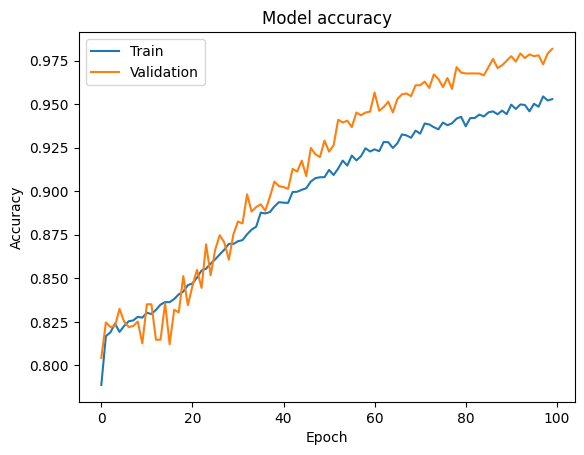

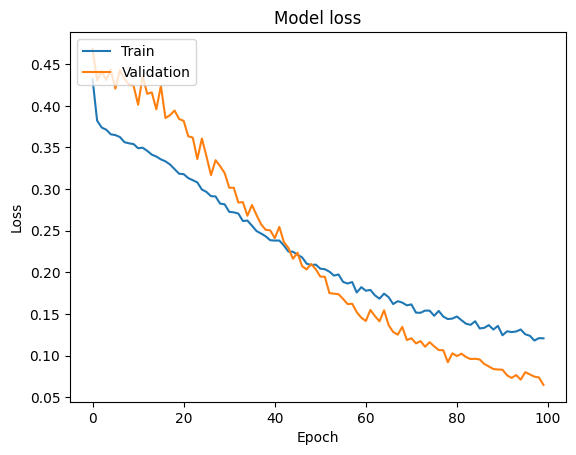

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scale, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Evaluating the model on the training set
train_loss, train_accuracy = best_model.evaluate(X_train_smote_scale, y_train_smote_cat)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0622
Test Loss: 0.06488405913114548
Test Accuracy: 0.9817327857017517
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9828 - loss: 0.0614
Train Loss: 0.047564711421728134
Train Accuracy: 0.986824095249176


In [ ]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test_scale)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_cat.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1611
           1       0.96      0.92      0.94       305

    accuracy                           0.98      1916
   macro avg       0.97      0.96      0.97      1916
weighted avg       0.98      0.98      0.98      1916

